## Overview

The code generates figures 3 and 4 in section 3.1 and 3.2 of the paper. 

In [1]:
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.transforms import ScaledTranslation
import matplotlib.gridspec as gridspec
import math

In [2]:
#True values
alpha_true = 0.2
Lambda_true = 0.8
Tb_true = 293
C_true = 2.2e6
beta_true = 1.5
h_true = 15
omega = 2*np.pi/(24*3600)
d_omega = np.sqrt(8*np.pi**2*Lambda_true/C_true/omega)
print(d_omega)

0.6283410831360573


In [3]:
all_initial = np.loadtxt('final_parameter_values_1depth_euler_1.txt')[0::2,:]
all_final = np.loadtxt('final_parameter_values_1depth_euler_1.txt')[1::2,:]
for i in range(2,6):
    all_initial = np.concatenate((all_initial,np.loadtxt('final_parameter_values_1depth_euler_'+str(i)+'.txt')[0::2,:]),0)
    all_final = np.concatenate((all_final,np.loadtxt('final_parameter_values_1depth_euler_'+str(i)+'.txt')[1::2,:]),0)

parameters = ['alpha','h','beta','Lambda','Tb','C']
for p in range(6):
    globals()[parameters[p]+'_final_values'] = []
    globals()[parameters[p]+'_initial_values'] = []
    for i in range(50):
        globals()[parameters[p]+'_initial_values'].append(all_initial[i,p])
        globals()[parameters[p]+'_final_values'].append(all_final[i,p])

In [4]:
all_initial_2 = np.loadtxt('final_parameter_values_2depths_euler_1.txt')[0::2,:]
all_final_2 = np.loadtxt('final_parameter_values_2depths_euler_1.txt')[1::2,:]
for i in range(2,6):
    all_initial_2 = np.concatenate((all_initial_2,np.loadtxt('final_parameter_values_2depths_euler_'+str(i)+'.txt')[0::2,:]),0)
    all_final_2 = np.concatenate((all_final_2,np.loadtxt('final_parameter_values_2depths_euler_'+str(i)+'.txt')[1::2,:]),0)

parameters = ['alpha','h','beta','Lambda','Tb','C']
for p in range(6):
    globals()[parameters[p]+'_final_values_2'] = []
    globals()[parameters[p]+'_initial_values_2'] = []
    for i in range(50):
        globals()[parameters[p]+'_initial_values_2'].append(all_initial_2[i,p])
        globals()[parameters[p]+'_final_values_2'].append(all_final_2[i,p])

In [5]:
h_beta_initial_values = [x*(1+1/y) for x,y in zip(h_initial_values,beta_initial_values)]
h_beta_initial_values_2 = [x*(1+1/y) for x,y in zip(h_initial_values_2,beta_initial_values_2)]

h_beta_final_values = [x*(1+1/y) for x,y in zip(h_final_values,beta_final_values)]
h_beta_final_values_2 = [x*(1+1/y) for x,y in zip(h_final_values_2,beta_final_values_2)]

mu_initial_values = [np.sqrt(x*y) for x,y in zip(C_initial_values,Lambda_initial_values)]
mu_initial_values_2 = [np.sqrt(x*y) for x,y in zip(C_initial_values_2,Lambda_initial_values_2)]
mu_final_values = [np.sqrt(x*y) for x,y in zip(C_final_values,Lambda_final_values)]
mu_final_values_2 = [np.sqrt(x*y) for x,y in zip(C_final_values_2,Lambda_final_values_2)]

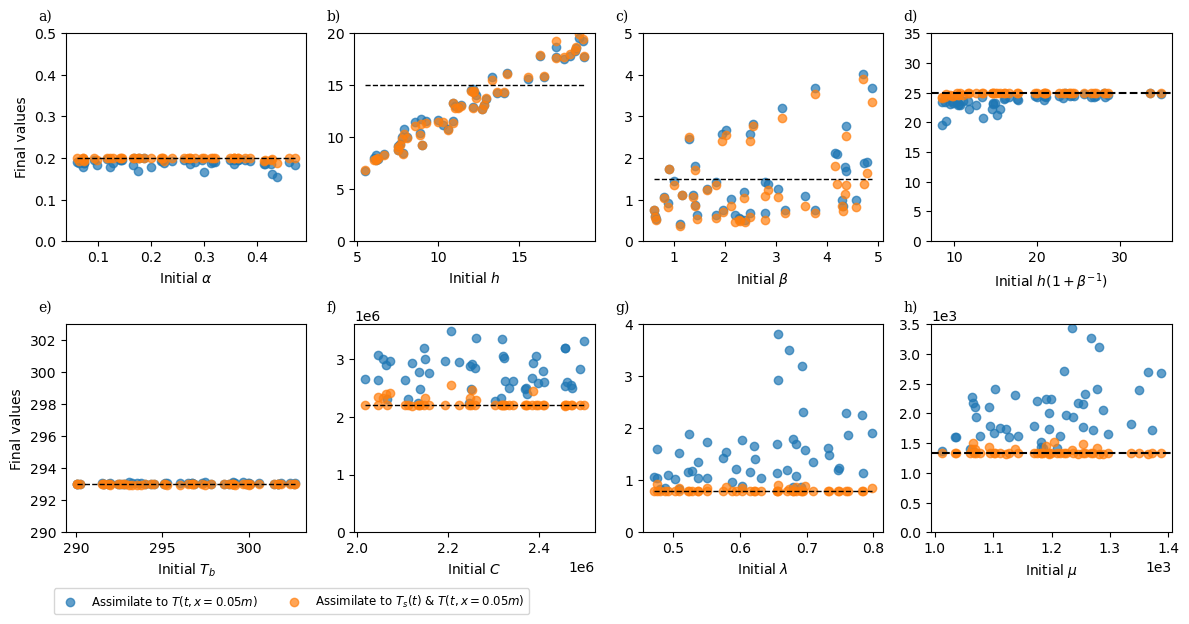

In [7]:
parameters = ['Tb','alpha','h','C','beta','Lambda']
labels = ['a)','b)','c)', 'd)', 'e)','f)']
    
fig,ax = plt.subplots(2,4,figsize=(12, 6))

ax[0,0].set_xlabel(r'Initial $\alpha$')
ax[0,0].set_ylabel(r'Final values')
ax[0,0].scatter(globals()['alpha_initial_values'],globals()['alpha_final_values'], alpha=0.7,label=r'$Assimilate to T(x=0.05m)$')
ax[0,0].scatter(globals()['alpha_initial_values_2'],globals()['alpha_final_values_2'], alpha=0.7,label=r'$Assimilate to T_s & T(x=0.05m)$')
ax[0,0].hlines(globals()['alpha_true'],xmin=min(globals()['alpha_initial_values_2']), xmax=max(globals()['alpha_initial_values_2']),linewidth=1,color = 'black',linestyles = 'dashed')
ax[0,0].text(
        0.0, 1.0, 'a)', transform=(
            ax[0,0].transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='medium', va='bottom', fontfamily='serif')
ax[0,0].set_ylim([0.0,0.5])

ax[0,1].set_xlabel(r'Initial $h$')
#ax01.set_ylabel(r'Final $h$')
ax[0,1].scatter(globals()['h_initial_values'],globals()['h_final_values'], alpha=0.7,label=r'$Assimilate to T(x=0.05m)$')
ax[0,1].scatter(globals()['h_initial_values_2'],globals()['h_final_values_2'], alpha=0.7,label=r'$Assimilate to T_s & T(x=0.05m)$')
ax[0,1].hlines(globals()['h_true'],xmin=min(globals()['h_initial_values_2']), xmax=max(globals()['h_initial_values_2']),linewidth=1,color = 'black',linestyles = 'dashed')
ax[0,1].text(
        0.0, 1.0, 'b)', transform=(
            ax[0,1].transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='medium', va='bottom', fontfamily='serif')
ax[0,1].set_ylim([0,20])

ax[0,2].set_xlabel(r'Initial $\beta$')
#ax02.set_ylabel(r'Final $\beta$')
ax[0,2].scatter(globals()['beta_initial_values'],globals()['beta_final_values'], alpha=0.7,label=r'$Assimilate to T(x=0.05m)$')
ax[0,2].scatter(globals()['beta_initial_values_2'],globals()['beta_final_values_2'], alpha=0.7,label=r'$Assimilate to T_s & T(x=0.05m)$')
ax[0,2].hlines(globals()['beta_true'],xmin=min(globals()['beta_initial_values_2']), xmax=max(globals()['beta_initial_values_2']),linewidth=1,color = 'black',linestyles = 'dashed')
ax[0,2].text(
        0.0, 1.0, 'c)', transform=(
            ax[0,2].transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='medium', va='bottom', fontfamily='serif')
ax[0,2].set_ylim([0,5])

ax[0,3].scatter(h_beta_initial_values,h_beta_final_values, alpha=0.7, label='one depth')
ax[0,3].scatter(h_beta_initial_values_2,h_beta_final_values_2, alpha=0.7, label='two depths')
ax[0,3].axhline(y=h_true*(1+1/beta_true),color = 'black',linestyle = 'dashed')
ax[0,3].set_xlabel(r'Initial $h(1+\beta^{-1})$')
#ax03.set_ylabel(r'Final $h(1+\beta^{-1})$')
ax[0,3].set_ylim([0,35])
ax[0,3].text(
        0.0, 1.0, 'd)', transform=(
            ax[0,3].transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='medium', va='bottom', fontfamily='serif')


ax[1,0].set_ylim([290,303])
ax[1,0].set_xlabel(r'Initial $T_b$')
ax[1,0].set_ylabel(r'Final values')
ax[1,0].scatter(globals()['Tb_initial_values'],globals()['Tb_final_values'], alpha=0.7,label=r'$Assimilate to T(x=0.05m)$')
ax[1,0].scatter(globals()['Tb_initial_values_2'],globals()['Tb_final_values_2'], alpha=0.7,label=r'$Assimilate to T_s & T(x=0.05m)$')
ax[1,0].hlines(globals()['Tb_true'],xmin=min(globals()['Tb_initial_values_2']), xmax=max(globals()['Tb_initial_values_2']),linewidth=1,color = 'black',linestyles = 'dashed')
ax[1,0].text(
        0.0, 1.0, 'e)', transform=(
            ax[1,0].transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='medium', va='bottom', fontfamily='serif')


ax[1,1].set_ylim([0,3.6e6])
ax[1,1].set_xlabel(r'Initial $C$')
#ax11.set_ylabel(r'Final $C$')
ax[1,1].scatter(globals()['C_initial_values'],globals()['C_final_values'], alpha=0.7,label=r'$Assimilate to T(x=0.05m)$')
ax[1,1].scatter(globals()['C_initial_values_2'],globals()['C_final_values_2'], alpha=0.7,label=r'$Assimilate to T_s & T(x=0.05m)$')
ax[1,1].hlines(globals()['C_true'],xmin=min(globals()['C_initial_values_2']), xmax=max(globals()['C_initial_values_2']),linewidth=1,color = 'black',linestyles = 'dashed')
ax[1,1].text(
        0.0, 1.0, 'f)', transform=(
            ax[1,1].transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='medium', va='bottom', fontfamily='serif')


ax[1,2].set_xlabel(r'Initial $\lambda$')
#ax12.set_ylabel(r'Final $\lambda$')
ax[1,2].scatter(globals()['Lambda_initial_values'],globals()['Lambda_final_values'], alpha=0.7,label=r'$Assimilate to T(x=0.05m)$')
ax[1,2].scatter(globals()['Lambda_initial_values_2'],globals()['Lambda_final_values_2'], alpha=0.7,label=r'$Assimilate to T_s & T(x=0.05m)$')
ax[1,2].hlines(globals()['Lambda_true'],xmin=min(globals()['Lambda_initial_values_2']), xmax=max(globals()['Lambda_initial_values_2']),linewidth=1,color = 'black',linestyles = 'dashed')
ax[1,2].text(
        0.0, 1.0, 'g)', transform=(
            ax[1,2].transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='medium', va='bottom', fontfamily='serif')
ax[1,2].set_ylim([0,4])

ax[1,3].scatter(mu_initial_values,mu_final_values, alpha=0.7,label='one depth')
ax[1,3].scatter(mu_initial_values_2,mu_final_values_2, alpha=0.7,label='two depths')
ax[1,3].axhline(y=np.sqrt(C_true*Lambda_true),color = 'black',linestyle = 'dashed')
#plt.xlim([0,4e6])
ax[1,3].set_ylim([0,3500])
ax[1,3].set_xlabel(r'Initial $\mu$')
ax[1,3].ticklabel_format(axis='both', style='sci', scilimits=(3,3))

#ax13.set_ylabel(r'Final $\mu$')
ax[1,3].text(
        0.0, 1.0, 'h)', transform=(
            ax[1,3].transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='medium', va='bottom', fontfamily='serif')

fig.tight_layout()

fig.legend([r'Assimilate to $T(t,x=0.05m)$',r'Assimilate to $T_s(t)$ & $T(t,x=0.05m)$'], ncol = 2,bbox_to_anchor=(0.45, 0.02),fontsize=8.5)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

fig.savefig("cov.png",bbox_inches='tight')



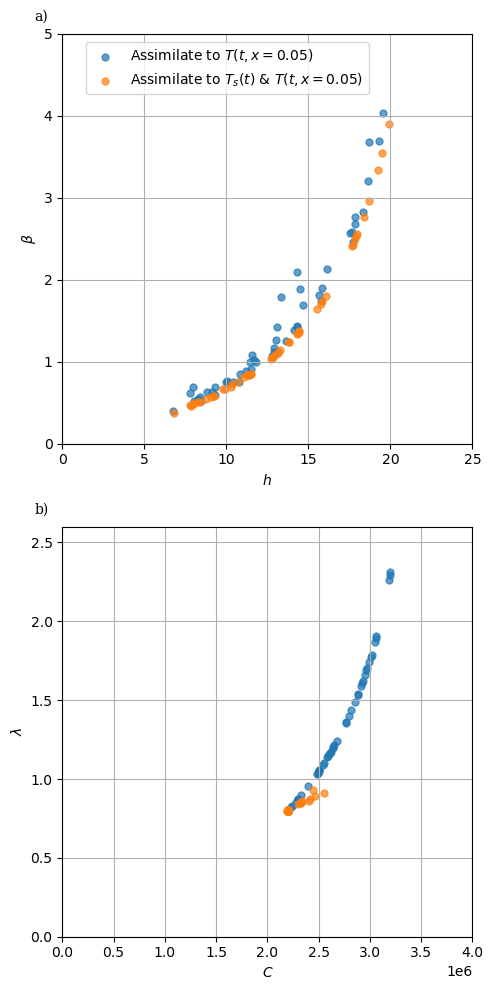

In [8]:
fig,ax = plt.subplots(2,1,figsize=(5,10))
plt.rcParams['lines.markersize'] = 5
ax[0].scatter(h_final_values,beta_final_values,alpha=0.7)
ax[0].scatter(h_final_values_2,beta_final_values_2,alpha=0.7)
ax[0].set_box_aspect(1)
ax[0].set_xlabel(r'$h$')
ax[0].set_ylabel(r'$\beta$')
ax[0].set_xlim([0,25])
ax[0].set_ylim([0,5])
ax[0].text(
        0.0, 1.0, 'a)', transform=(
            ax[0].transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='medium', va='bottom', fontfamily='serif')
ax[0].grid()

ax[1].scatter(C_final_values,Lambda_final_values,alpha=0.7)
ax[1].scatter(C_final_values_2,Lambda_final_values_2,alpha=0.7)
ax[1].set_box_aspect(1)
ax[1].set_xlabel(r'$C$')
ax[1].set_ylabel(r'$\lambda$')
ax[1].set_xlim([0,4e6])
ax[1].set_ylim([0,2.6])
ax[1].text(
        0.0, 1.0, 'b)', transform=(
            ax[1].transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='medium', va='bottom', fontfamily='serif')
ax[1].grid()

fig.tight_layout()
fig.legend([r'Assimilate to $T(t,x=0.05)$',r'Assimilate to $T_s(t)$ & $T(t,x=0.05)$'],bbox_to_anchor=(0.75, 0.96))

fig.savefig("hbeta_Clambda_cov.png")